In [5]:
# %%script false --no-raise-error
import pandas as pd
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

# show all rows/columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.1f' % x) #print float as int

def get_corr_max(corr):
    return corr[corr < 1].apply(lambda x: (x.max(), x.idxmax())).sort_values(by = 0, axis = 1, ascending = False)

_df = pd.read_csv("en.openfoodfacts.org.products.tsv", error_bad_lines=False, sep='\t', low_memory=False, nrows = None)
print("✅ Setup complete.")

✅ Setup complete.


In [6]:
from tools import *
#le dataframe est copié pour le garder comme base de travail et on lui ajoute des méthodes à travers notre classe Table
df = Table(_df.copy())


In [7]:
df2 = Table(_df.copy())
df2[["salt_100g", "sodium_100g"]].corr()

,salt_100g,sodium_100g
salt_100g,1.0,1.0
sodium_100g,1.0,1.0


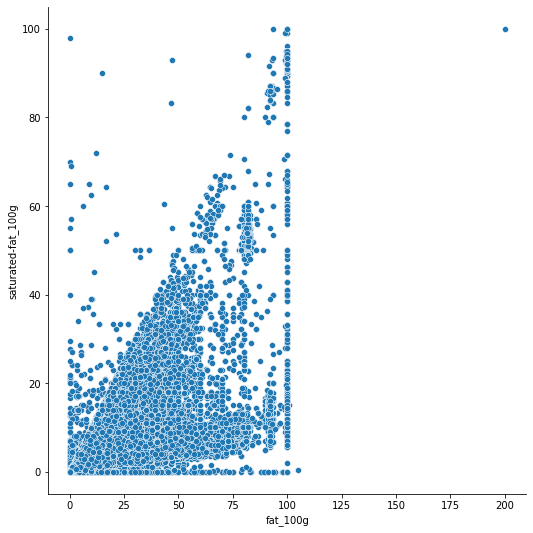

In [8]:
sns.pairplot(
    df2,
    x_vars=["fat_100g"],
    y_vars=["saturated-fat_100g"],
    height=7.5
)

In [9]:
no_sugar = df2[(df2["pnns_groups_2"] == "Non-sugared beverages")].sort_values(by = "sugars_100g", ascending = False)
no_sugar = no_sugar[['product_name', 'pnns_groups_2', 'sugars_100g','-sucrose_100g','-glucose_100g','-fructose_100g','-lactose_100g','-maltose_100g','-maltodextrins_100g','starch_100g','polyols_100g']]
no_sugar.head(20)

,product_name,pnns_groups_2,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g
347988,Sauce Dessert Au Caramel,Non-sugared beverages,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180091,Bio Agaven Dicksaft,Non-sugared beverages,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266528,Thé Citron Boisson Instantanée,Non-sugared beverages,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317910,Tisane bonne nuit,Non-sugared beverages,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188882,Sirop d'agave,Non-sugared beverages,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347836,20 Kruiden oplosthee,Non-sugared beverages,92.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246251,Picot - Boisson Fenouil Bio,Non-sugared beverages,88.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278946,Ukus limuna,Non-sugared beverages,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191797,Sirop de canne,Non-sugared beverages,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246386,"Nutriben Boissons Tilleul, Fleur D'oranger, Mé...",Non-sugared beverages,87.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploration des données

In [10]:
# %%script false --no-raise-error
md(f"lignes : {df.shape[0]}")
md(f"colonnes : {df.shape[1]}")


display(df.describe())

cols = []
for col in df:
    size = df[col].size
    size_notna = df[col].notna().sum()
    serie = df[col]
    col = {
        "name": col,
        "dtype": serie.dtype,
        "NaN / size" : get_value_with_perc(size, serie.isna().sum()),
        "unique / not NaN" : get_value_with_perc(size_notna, len(serie.unique().tolist())),
        "values" : str(serie.value_counts().index.to_list()[:10])
    }
    cols.append(col)
    
infos = pd.DataFrame(data = cols)
display(infos)



lignes : 356027

colonnes : 163

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.0,283867.0,0.0,283867.0,0.0,0.0,295367.0,869.0,279497.0,263823.0,0.0,0.0,1.0,2.0,4.0,1.0,1.0,1.0,27.0,26.0,0.0,0.0,1.0,0.0,23040.0,23075.0,938.0,201.0,43.0,89.0,207.0,159.0,9.0,27.0,26.0,25.0,15.0,0.0,16.0,0.0,0.0,0.0,143443.0,144170.0,279220.0,279186.0,85.0,32.0,44.0,278.0,6.0,11.0,291.0,451.0,220683.0,294161.0,29.0,17.0,9.0,289739.0,289694.0,4577.0,137706.0,35.0,7207.0,1472.0,930.0,141060.0,11277.0,10925.0,11831.0,6897.0,5330.0,3046.0,5390.0,331.0,2551.0,73.0,99.0,24848.0,198.0,141517.0,5938.0,140660.0,6392.0,3964.0,2122.0,1639.0,99.0,1181.0,23.0,20.0,288.0,91.0,33.0,52.0,3228.0,404.0,182.0,1383.0,0.0,278.0,254856.0,254856.0,0.0,0.0
mean,NaN,1.9,0.0,NaN,0.1,NaN,NaN,1125.5,587.2,56065.9,5.1,NaN,NaN,7.4,6.0,36.1,18.9,8.1,3.0,10.4,10.3,NaN,NaN,61.0,NaN,10.5,6.4,3.5,2.2,2.8,1.6,18.7,12.5,0.1,0.2,0.1,41.2,26.1,NaN,0.0,NaN,NaN,NaN,0.1,0.0,56140.2,15.7,12.8,2.9,24.8,6.0,17.1,12.2,30.9,49.1,384346.7,53266.0,4.4,2.4,0.0,1.9,0.8,8.3,0.0,0.5,0.0,0.1,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.4,0.1,0.4,0.1,0.1,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,12.3,6.5,33.4,60.4,15.4,52.1,NaN,335.8,9.2,9.0,NaN,NaN
std,NaN,2.5,0.2,NaN,0.3,NaN,NaN,936.8,713.3,29633845.3,8.0,NaN,NaN,NaN,0.2,24.1,NaN,NaN,NaN,3.9,3.4,NaN,NaN,NaN,NaN,16.8,10.9,8.7,7.8,13.1,2.0,32.6,110.9,0.0,0.0,0.0,25.1,25.5,NaN,0.0,NaN,NaN,NaN,1.5,0.4,29648540.7,22.0,15.2,5.9,29.3,14.0,17.8,8.4,24.8,33.1,180552853.3,28885775.9,3.0,2.2,0.0,120.5,47.5,11.0,0.1,2.5,0.0,0.7,1.0,2.2,2.6,1.3,0.3,1.7,0.3,5.1,0.0,0.0,1.5,1.4,0.2,12.5,0.1,3.3,12.0,0.2,13.4,0.1,0.9,0.0,0.1,0.1,0.0,0.0,0.0,7.7,69.6,2.0,32.9,29.3,3.7,19.0,NaN,423.2,9.0,9.2,NaN,NaN
min,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,7.4,5.9,0.0,18.9,8.1,3.0,0.1,5.2,NaN,NaN,61.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.0,1.0,1.1,NaN,0.0,NaN,NaN,NaN,-3.6,0.0,0.0,-17.9,0.0,0.0,0.0,0.0,0.1,1.5,0.0,0.0,-6.7,-800.0,0.7,0.3,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-6.9,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,NaN,0.0,-15.0,-15.0

,name,dtype,NaN / size,unique / not NaN,values
0,code,object,26/356027 (0.01%),356002/356001 (100.0%),"['3113010126893', '3380390000963', '3564700730..."
1,url,object,26/356027 (0.01%),356002/356001 (100.0%),['http://world-en.openfoodfacts.org/product/50...
2,creator,object,3/356027 (0.0%),3891/356024 (1.09%),"['usda-ndb-import', 'openfoodfacts-contributor..."
3,created_t,object,3/356027 (0.0%),224752/356024 (63.13%),"['1489077120', '1489055829', '1489050353', '14..."
4,created_datetime,object,10/356027 (0.0%),224753/356017 (63.13%),"['2017-03-09T10:37:09Z', '2017-03-09T16:32:00Z..."
5,last_modified_t,object,0/356027 (0.0%),216836/356027 (60.9%),"['1439141742', '1439141747', '1439141730', '14..."
6,last_modified_datetime,object,0/356027 (0.0%),216836/356027 (60.9%),"['2015-08-09T17:35:42Z', '2015-08-09T17:35:47Z..."
7,product_name,object,17512/356027 (4.92%),249246/338515 (73.63%),"['Ice Cream', 'Extra Virgin Olive Oil', 'Potat..."
8,generic_name,object,298313/356027 (83.79%),42452/57714 (73.56%),['Pâtes alimentaires au blé dur de qualité sup...
9,quantity,object,236742/356027 (66.5%),15564/119285 (13.05%),"['500 g', '200 g', '250 g', '100 g', '400 g', ..."


In [11]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

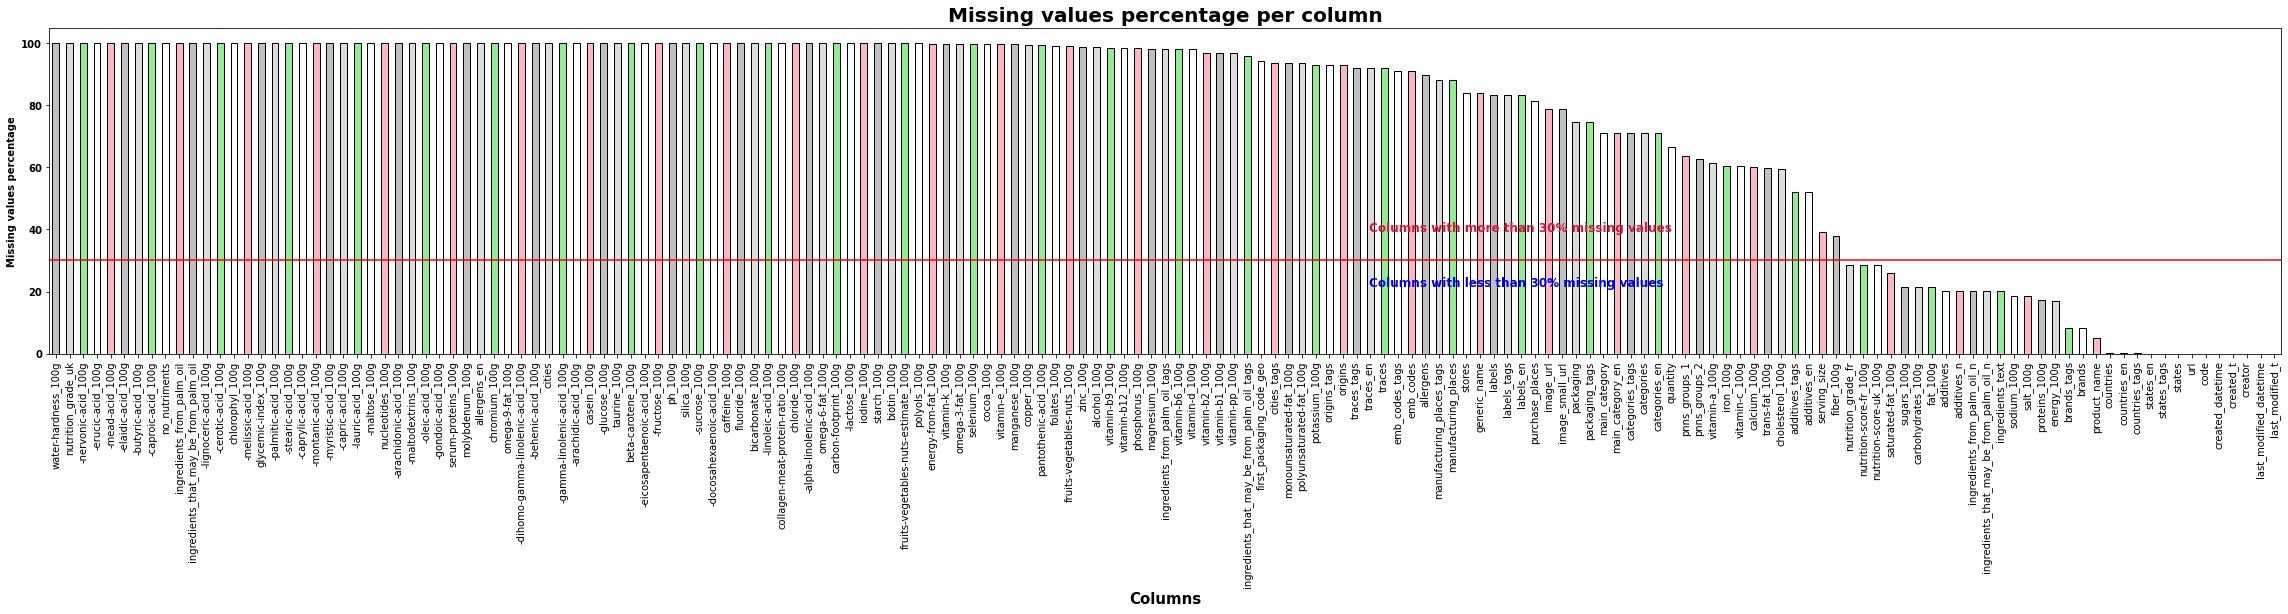

In [12]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=40, height=6):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df,30, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

In [13]:
print(f"Data shape before cleaning {df.shape}")
# df.dropna(thresh=df.shape[1]*0.3, axis=1, inplace = True)
print(f"Data shape after cleaning {df.shape}")

Data shape before cleaning (356027, 163)
Data shape after cleaning (356027, 163)


In [14]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.0,283867.0,0.0,283867.0,0.0,0.0,295367.0,869.0,279497.0,263823.0,0.0,0.0,1.0,2.0,4.0,1.0,1.0,1.0,27.0,26.0,0.0,0.0,1.0,0.0,23040.0,23075.0,938.0,201.0,43.0,89.0,207.0,159.0,9.0,27.0,26.0,25.0,15.0,0.0,16.0,0.0,0.0,0.0,143443.0,144170.0,279220.0,279186.0,85.0,32.0,44.0,278.0,6.0,11.0,291.0,451.0,220683.0,294161.0,29.0,17.0,9.0,289739.0,289694.0,4577.0,137706.0,35.0,7207.0,1472.0,930.0,141060.0,11277.0,10925.0,11831.0,6897.0,5330.0,3046.0,5390.0,331.0,2551.0,73.0,99.0,24848.0,198.0,141517.0,5938.0,140660.0,6392.0,3964.0,2122.0,1639.0,99.0,1181.0,23.0,20.0,288.0,91.0,33.0,52.0,3228.0,404.0,182.0,1383.0,0.0,278.0,254856.0,254856.0,0.0,0.0
mean,NaN,1.9,0.0,NaN,0.1,NaN,NaN,1125.5,587.2,56065.9,5.1,NaN,NaN,7.4,6.0,36.1,18.9,8.1,3.0,10.4,10.3,NaN,NaN,61.0,NaN,10.5,6.4,3.5,2.2,2.8,1.6,18.7,12.5,0.1,0.2,0.1,41.2,26.1,NaN,0.0,NaN,NaN,NaN,0.1,0.0,56140.2,15.7,12.8,2.9,24.8,6.0,17.1,12.2,30.9,49.1,384346.7,53266.0,4.4,2.4,0.0,1.9,0.8,8.3,0.0,0.5,0.0,0.1,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.4,0.1,0.4,0.1,0.1,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,12.3,6.5,33.4,60.4,15.4,52.1,NaN,335.8,9.2,9.0,NaN,NaN
std,NaN,2.5,0.2,NaN,0.3,NaN,NaN,936.8,713.3,29633845.3,8.0,NaN,NaN,NaN,0.2,24.1,NaN,NaN,NaN,3.9,3.4,NaN,NaN,NaN,NaN,16.8,10.9,8.7,7.8,13.1,2.0,32.6,110.9,0.0,0.0,0.0,25.1,25.5,NaN,0.0,NaN,NaN,NaN,1.5,0.4,29648540.7,22.0,15.2,5.9,29.3,14.0,17.8,8.4,24.8,33.1,180552853.3,28885775.9,3.0,2.2,0.0,120.5,47.5,11.0,0.1,2.5,0.0,0.7,1.0,2.2,2.6,1.3,0.3,1.7,0.3,5.1,0.0,0.0,1.5,1.4,0.2,12.5,0.1,3.3,12.0,0.2,13.4,0.1,0.9,0.0,0.1,0.1,0.0,0.0,0.0,7.7,69.6,2.0,32.9,29.3,3.7,19.0,NaN,423.2,9.0,9.2,NaN,NaN
min,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,7.4,5.9,0.0,18.9,8.1,3.0,0.1,5.2,NaN,NaN,61.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.0,1.0,1.1,NaN,0.0,NaN,NaN,NaN,-3.6,0.0,0.0,-17.9,0.0,0.0,0.0,0.0,0.1,1.5,0.0,0.0,-6.7,-800.0,0.7,0.3,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-6.9,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,NaN,0.0,-15.0,-15.0

# Correction des données

In [15]:
md("**Filtre produit français**")

df = Table(df.select("countries_en == 'France'"))
print("Done! Nombre de lignes : ", df.shape[0])
type(df)

**Filtre produit français**

Done! Nombre de lignes :  123961


tools.Table

In [16]:
md("**Supression des valeurs uniquement digitales dans les colonnes de texte**")
df.remove_number()

**Supression des valeurs uniquement digitales dans les colonnes de texte**

suppression des chiffres dans les colonnes de texte...
valeurs NaN : 15269256
Done!
valeurs NaN : 15643387


In [17]:
md("**Assigner la valeur NaN à toutes les valeurs nulles (espace, unknown...)**")
df.empty_to_nan()

**Assigner la valeur NaN à toutes les valeurs nulles (espace, unknown...)**

empty_to_nan
nan values :  15643387
nan values :  15706065


In [18]:
#ça peut prendre un moment...
md(f"**Correction de l'encodage**")
# df.fix_encoding()
md("Done! logs at fix_encoding.txt")
# 

**Correction de l'encodage**

Done! logs at fix_encoding.txt

In [19]:
md("**Fusion des colonnes proches (categories, categorie_tags...)**")
df.copy_value_from_child()

**Fusion des colonnes proches (categories, categorie_tags...)**

In [20]:
md("**Correction des valeurs eronnées des apports alimentaires**")
df.fix_composition_values()
df["sodium_100g"] = df.apply(fix_sodium, axis = 1)
df["carbohydrates_100g"] = df.apply(fix_carbs, axis = 1)

**Correction des valeurs eronnées des apports alimentaires**

supression de 1 valeurs abérrantes sur la colonne fat_100g
supression de 7 valeurs abérrantes sur la colonne carbohydrates_100g
supression de 2 valeurs abérrantes sur la colonne sugars_100g
supression de 9 valeurs abérrantes sur la colonne fiber_100g
supression de 1 valeurs abérrantes sur la colonne proteins_100g
supression de 1 valeurs abérrantes sur la colonne vitamin-b1_100g
supression de 2 valeurs abérrantes sur la colonne calcium_100g
supression de 1 valeurs abérrantes sur la colonne taurine_100g
fix sodium
fix sodium
fix sodium


In [21]:
cols = ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'image_url', 'image_small_url', 'packaging','brands','categories','categories_en','origins','origins_tags','manufacturing_places','manufacturing_places_tags','labels','labels_en','emb_codes','emb_codes_tags','first_packaging_code_geo','purchase_places','countries','countries_tags','countries_en','traces','traces_en','additives_n',
 'additives','additives_en','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_tags','pnns_groups_1','states','states_tags','states_en','main_category_en','salt_100g','fruits-vegetables-nuts-estimate_100g','nutrition-score-uk_100g']
md(f"**Suppression des colonnes inutiles : {cols}**")
df.remove_cols(cols)

**Suppression des colonnes inutiles : ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'image_url', 'image_small_url', 'packaging', 'brands', 'categories', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'purchase_places', 'countries', 'countries_tags', 'countries_en', 'traces', 'traces_en', 'additives_n', 'additives', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'states', 'states_tags', 'states_en', 'main_category_en', 'salt_100g', 'fruits-vegetables-nuts-estimate_100g', 'nutrition-score-uk_100g']**

colonnes : 164
Done. colonnes : 122


In [22]:
md(f"**Suppression des colonnes vides**")
df.remove_empty_cols()

**Suppression des colonnes vides**

['cities', 'allergens_en', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-melissic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'folates_100g', 'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g']
colonnes : 122
Done. colonnes : 95


In [23]:
md(f"**Suppression des lignes dupliquées**")
df.remove_duplicated_rows()

**Suppression des lignes dupliquées**

5455/123961 lignes dupliquées.
Done. 118506 lignes maintenant


In [24]:
# print("shape: ", df.shape)
# display(df.columns.to_list())
md("Génération du rapport")
# profile = ProfileReport(df, title='fixed DF', minimal=True)
# profile.to_file("fixed.html")
md("Done! Comparer old.html et fixed.html")
mvp_cols = ["product_name", "categories_tags", "nutrition_grade_fr", "pnns_groups_2", "energy_100g", "fat_100g", "saturated-fat_100g", "sugars_100g", "carbohydrates_100g", "fiber_100g", "alcohol_100g", "fruits-vegetables-nuts_100g", "nutrition-score-fr_100g"]

Génération du rapport

Done! Comparer old.html et fixed.html

# Energy

<AxesSubplot:xlabel='energy_100g'>

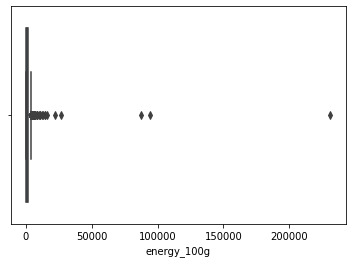

In [25]:
sns.boxplot(x=_df["energy_100g"])

<AxesSubplot:xlabel='energy_100g'>

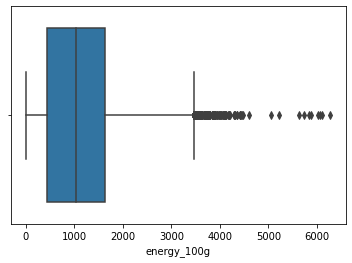

In [26]:
sns.boxplot(x=df["energy_100g"])

# Fat

<AxesSubplot:xlabel='fat_100g'>

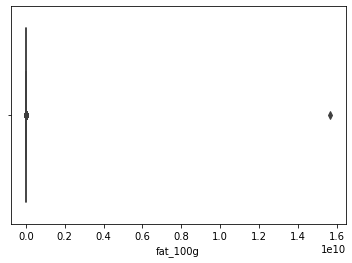

In [27]:
sns.boxplot(x=_df["fat_100g"])

<AxesSubplot:xlabel='fat_100g'>

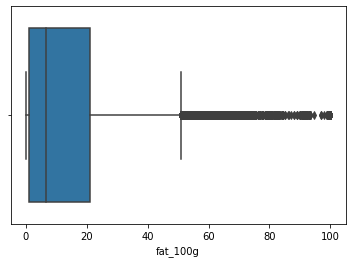

In [28]:
sns.boxplot(x=df["fat_100g"])

# Carbs

<AxesSubplot:xlabel='carbohydrates_100g'>

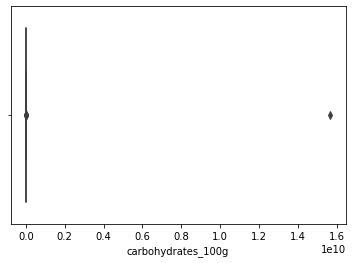

In [29]:
sns.boxplot(x=_df["carbohydrates_100g"])

<AxesSubplot:xlabel='carbohydrates_100g'>

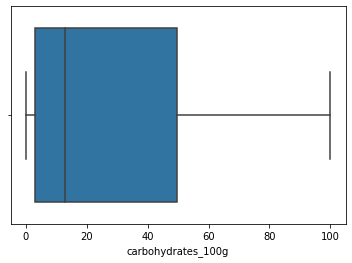

In [30]:
sns.boxplot(x=df["carbohydrates_100g"])

# Prots

<AxesSubplot:xlabel='proteins_100g'>

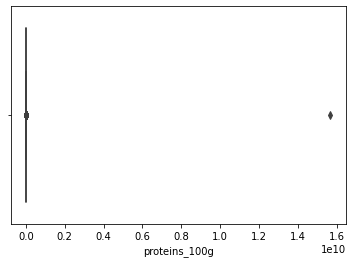

In [31]:
sns.boxplot(x=_df["proteins_100g"])

<AxesSubplot:xlabel='proteins_100g'>

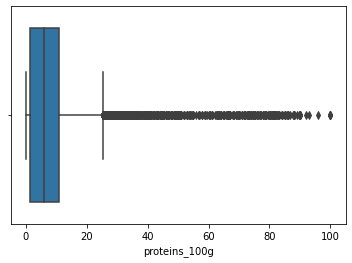

In [32]:
sns.boxplot(x=df["proteins_100g"])

In [33]:
# ax = df[["energy_100g", "fat_100g", "saturated-fat_100g", "sugars_100g", "carbohydrates_100g", "fiber_100g", "fruits-vegetables-nuts_100g", "nutrition-score-fr_100g"]].hist(figsize=(30,30))
# ax.locator_params(axis="x", nbins=3)
# ax.locator_params(axis="y", nbins=10)

In [34]:
# Nouvelle exploration

lignes : 11258070

colonnes : 95

nombre de valeurs vides :  353503


(70040, 95)

(70040, 96)

(68587, 8)

,energy_100g,fat_100g,sugars_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,fruits-vegetables-nuts_100g
0,0.8,0.8,0.8,0.8,0.7,0.6,0.3,0.2
1,fat_100g,energy_100g,carbohydrates_100g,sugars_100g,fat_100g,energy_100g,energy_100g,sugars_100g


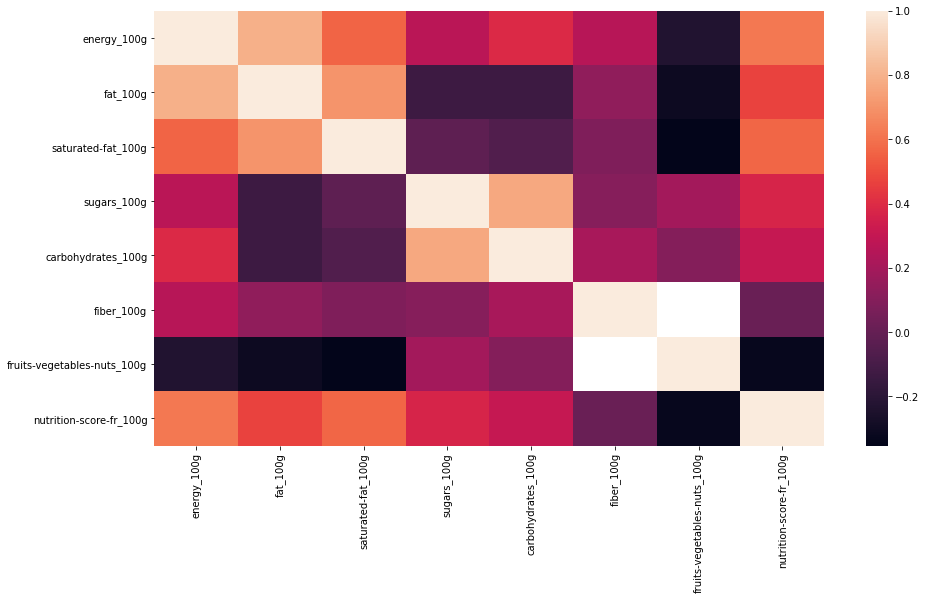

In [35]:
md(f"lignes : {df.size}")
md(f"colonnes : {df.shape[1]}")
print("nombre de valeurs vides : ", df[["energy_100g", "fat_100g", "saturated-fat_100g", "sugars_100g", "carbohydrates_100g", "fiber_100g", "fruits-vegetables-nuts_100g", "nutrition-score-fr_100g"]].isna().sum().sum())
df1 = df.copy()
df1 = df1[(df["nutrition-score-fr_100g"] > 0) & (df["nutrition-score-fr_100g"].notna())]
display(df1.shape)

df1["missing_cols"] = df1.apply(set_missing, axis = 1)
display(df1.shape)
df1 = df1[df1["missing_cols"] <= 3]
df1 = df1[["energy_100g", "fat_100g", "saturated-fat_100g", "sugars_100g", "carbohydrates_100g", "fiber_100g", "fruits-vegetables-nuts_100g", "nutrition-score-fr_100g"]]

# df1["missing_cols"].value_counts()
display(df1.shape)


plt.figure(figsize=(15,8))
sns.heatmap(df1.corr());


display(get_corr_max(df1.corr()))

corr1 = df1.corr()
# for category in df["pnns_groups_2"].value_counts().index.to_list():
#     plt.figure()
#     sns.boxplot(x=df[df["pnns_groups_2"] == category]["fat_100g"]).set_title(category);
    
    

# df["categories_tags"].value_counts()
# df["pnns_groups_2"].value_counts()
# df["is_valid_calc"].value_counts()

# cols = []
# for col in df:
#     size = df[col].size
#     size_notna = df[col].notna().sum()
#     serie = df[col]
#     col = {
#         "name": col,
#         "dtype": serie.dtype,
#         "NaN / size" : get_value_with_perc(size, serie.isna().sum()),
#         "unique / not NaN" : get_value_with_perc(size_notna, len(serie.unique().tolist())),
#         "values" : str(serie.value_counts().index.to_list()[:10])
#     }
#     cols.append(col)
    
# infos = pd.DataFrame(data = cols)
# display(infos)  

In [36]:
df1.head()
df1.shape
df1.isna().sum().sum()
# imputer = KNNImputer(n_neighbors=2)
# res = imputer.fit_transform(df1)


106583

In [37]:
# df2 = pd.DataFrame(res)
# corr2 = df2.corr()
# plt.figure(figsize=(15,8))
# sns.heatmap(df2.corr());

In [38]:
# display(corr1)
# display(corr2)
# diff = corr2.to_numpy() - corr1.to_numpy()
# # diff = df1-df2
# display(pd.DataFrame(diff))